# QuTiP Example: Clifford Group Elements

[Christopher Granade](http://www.cgranade.com/) <br>
University of Sydney
$\newcommand{\ket}[1]{\left|#1\right\rangle}$
$\newcommand{\bra}[1]{\left\langle#1\right|}$
$\newcommand{\cnot}{{\scriptstyle \rm CNOT}}$
$\newcommand{\Tr}{\operatorname{Tr}}$

## Introduction

In this notebook, we will demonstrate the ``qubit_clifford_group`` generator, which yields each element of the Clifford group on a single qubit.

## Preamble

### Features

We enable a few features such that this notebook runs in both Python 2 and 3.

In [1]:
from __future__ import division, print_function

### Imports

In [2]:
import numpy as np
import qutip as qt

from qutip.ipynbtools import version_table
from IPython.display import display

### Plotting Support

In [3]:
%matplotlib inline

### Settings

In [4]:
qt.settings.colorblind_safe = True

## Clifford Group ##

The Clifford group $\mathcal{C}_n$ on $n$ qubits is the group of automorphisms of the Pauli group $\mathcal{P}_n$, $\mathcal{C}_n = \{U | \forall P \in \mathcal{P}_n: U P U^\dagger \in \mathcal{P}_n\}$, and is generated by the CNOT, Hadamard and phase gates. The Clifford group is very useful in a number of different contexts in quantum information such as error correction and randomized benchmarking. In particular, the Clifford group is often of interest because the Gottesman-Knill theorem gives that a circuit made up only of Clifford gates, Pauli preparations and Pauli measurements can be efficiently simulated with classical resources. This simulation proceeds by representing Clifford group elements by their action on a generating set for the Pauli group--- this representation requires only polynomially many classical bits with the number of qubits.

At times, however, we will need representations of Clifford group elements as unitary operators on the full Hilbert space. This is useful, for instance, in reasoning about how *imperfect* Clifford group elements behave. QuTiP provides a generator, ``qubit_clifford_group``, that iterates over the elements of the Clifford group on a single qubit.

In [5]:
cliffords = list(qt.qubit_clifford_group())

This generator works by using the decomposition exploited by [Ross and Selinger](https://hackage.haskell.org/package/newsynth) in their circuit synthesis package. In particular, they use that the single-qubit Clifford group can be characterized as
\begin{equation}
    \mathcal{C}_1 = \left\{
        \omega^i E^j X^k S^\ell |
        i \in \operatorname{range}(8),\ 
        j \in \operatorname{range}(3),\ 
        k \in \operatorname{range}(2),\ 
        \ell \in \operatorname{range}(4)
    \right\},
\end{equation}
where $\omega = \mathrm{e}^{2\pi \mathrm{i} / 8}$, $S$ is the $\pi / 2$ phase gate, $E = \omega^3 H S^3$, $H$ is the Hadamard gate and $X$ is the familiar Pauli matrix. The function ``qubit_clifford_group`` yields this characterization, save for the iteration over powers of ``\omega``.

In [6]:
display("S", cliffords[1])
display("X", cliffords[4])
display("E", cliffords[8])

'S'

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j  0.+1.j]]

'X'

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.  1.]
 [ 1.  0.]]

'E'

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-0.5+0.5j  0.5+0.5j]
 [-0.5+0.5j -0.5-0.5j]]

These three gates can be understood in terms of their actions on the Pauli group. To demonstrate, we plot the superoperator representations for each of $S$, $X$ and $E$ in the Pauli basis as Hinton diagrams.

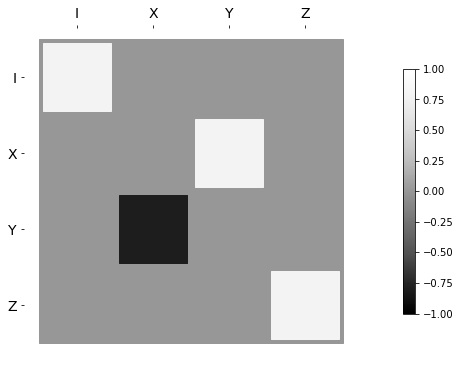

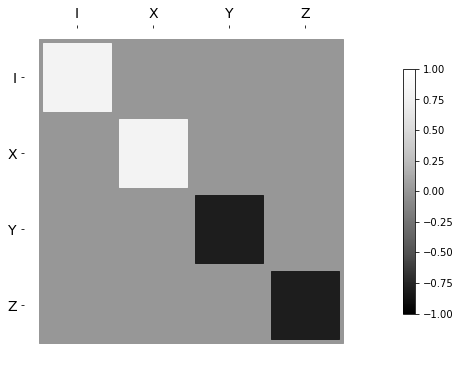

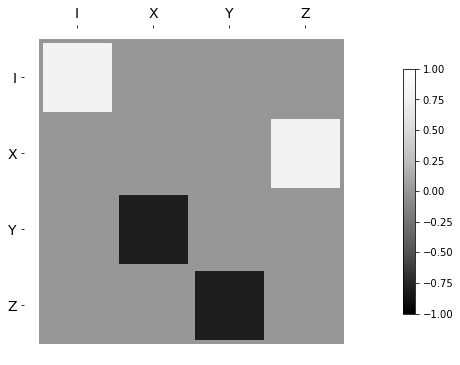

In [7]:
qt.visualization.hinton(qt.to_super(cliffords[1]));
qt.visualization.hinton(qt.to_super(cliffords[4]));
qt.visualization.hinton(qt.to_super(cliffords[8]));

## Epilouge

In [8]:
version_table()

Software,Version
QuTiP,4.2.0
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
